<a href="https://colab.research.google.com/github/continuousml/WBarycenter/blob/main/Bures_Wasserstein_Barycenter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def draw_conf2D(mu,cov,ax,edgecolor='k',facecolor='none',n_std=2,**kwargs):
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
  # Using a special case to obtain the eigenvalues of this
  # two-dimensional dataset.
  ell_radius_x = np.sqrt(1 + pearson)
  ell_radius_y = np.sqrt(1 - pearson)
  ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                    facecolor=facecolor, edgecolor=edgecolor, **kwargs)

  # Calculating the standard deviation of x from
  # the squareroot of the variance and multiplying
  # with the given number of standard deviations.
  scale_x = np.sqrt(cov[0, 0]) * n_std
  mean_x = mu[0]

  # calculating the standard deviation of y ...
  scale_y = np.sqrt(cov[1, 1]) * n_std
  mean_y = mu[1]

  transf = transforms.Affine2D() \
      .rotate_deg(45) \
      .scale(scale_x, scale_y) \
      .translate(mean_x, mean_y)

  ellipse.set_transform(transf + ax.transData)
  return ax.add_patch(ellipse)

In [ ]:
def sqrtm(A):
  eig,eig_vec = np.linalg.eig(A)
  assert (1*(eig<=0)).sum()==0
  return eig_vec@np.diag(np.sqrt(eig))@eig_vec.T
def bWB(mus,covs,thresh=1e-5,max_iter=100):
  N = len(covs)
  mu = np.mean(mus,0)
  A = np.eye(mus[0].shape[0])
  log = []
  for m in range(max_iter):
    A_new = np.zeros_like(A)
    A_sq = sqrtm(A)
    for n in range(N):
      A_new += (1/N)*sqrtm(A_sq@covs[n]@A_sq)
    log.append(((A-A_new)**2).sum())
    A = np.copy(A_new)
    # print(log)
    if log[-1]<thresh:
      break
  return mu, A, log


(-10.0, 10.0)

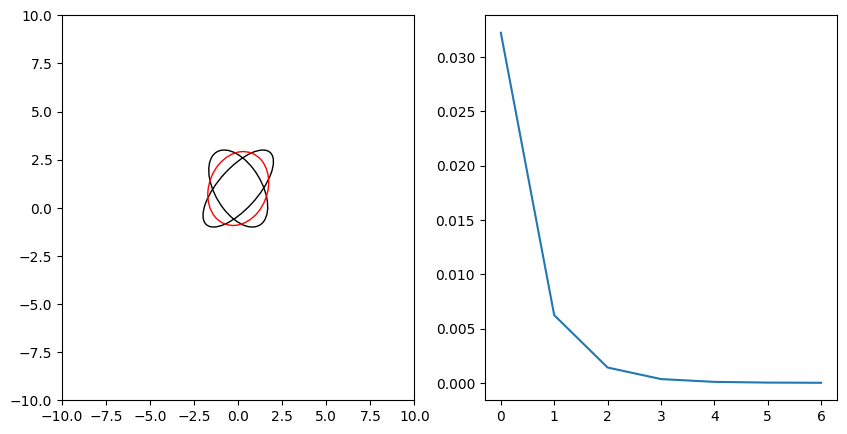

In [ ]:
N = 2
mus=[np.array([0,1]),np.array([0,1])]#,np.array([.5,.5])]
covs = [np.array([[1.,.7],[.7,1.]]),np.array([[.7,-.4],[-.4,1.]])]#, np.array([[1.,.2],[.2,1.]])]
mu, cov, log = bWB(mus,covs)
fig,ax = plt.subplots(1,2,figsize=(10,5))
for i in range(N):
  draw_conf2D(mus[i],covs[i],ax[0])
draw_conf2D(mu,cov,ax[0],edgecolor='r')
ax[1].plot(log)
ax[0].set_ylim([-10,10])
ax[0].set_xlim([-10,10])

(-10.0, 10.0)

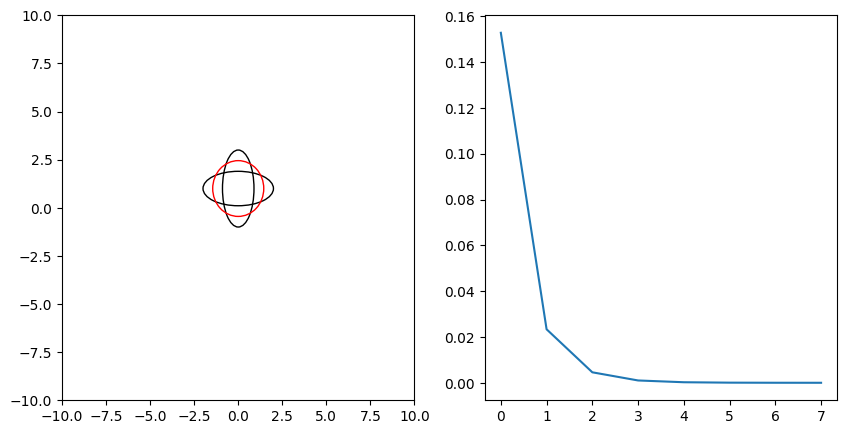

In [ ]:
N = 2
mus=[np.array([0,1]),np.array([0,1])]#,np.array([.5,.5])]
covs = [np.array([[1.,0],[0,.2]]),np.array([[.2,0],[0,1.]])]#, np.array([[1.,.2],[.2,1.]])]
mu, cov, log = bWB(mus,covs)
fig,ax = plt.subplots(1,2,figsize=(10,5))
for i in range(N):
  draw_conf2D(mus[i],covs[i],ax[0])
draw_conf2D(mu,cov,ax[0],edgecolor='r')
ax[1].plot(log)
ax[0].set_ylim([-10,10])
ax[0].set_xlim([-10,10])

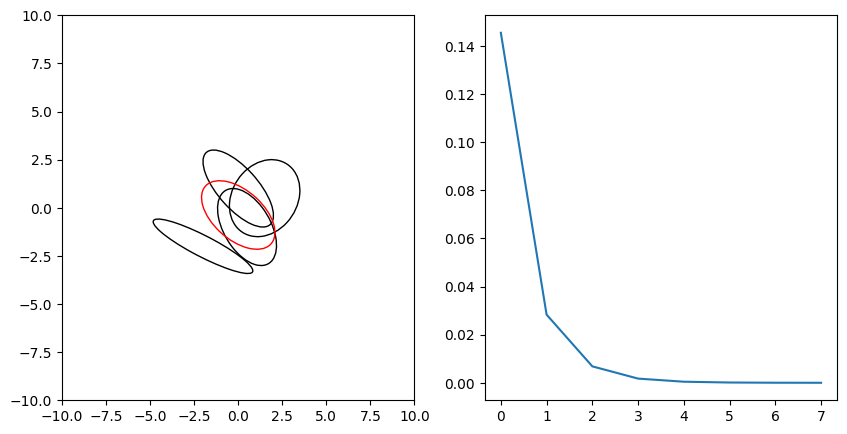

In [ ]:
N = 4
mus=[np.array([0,1]),
     np.array([0.5,-1]),
     np.array([1.5,.5]),
     np.array([-2,-2])]
covs = [np.array([[1.,-.7],[-.7,1.]]),
        np.array([[.7,-.4],[-.4,1.]]),
        np.array([[1.,.2],[.2,1.]]),
        np.array([[2.,-.9],[-.9,.5]])]
mu, cov, log = bWB(mus,covs)
fig,ax = plt.subplots(1,2,figsize=(10,5))
for i in range(N):
  draw_conf2D(mus[i],covs[i],ax[0])
draw_conf2D(mu,cov,ax[0],edgecolor='r')
ax[0].set_ylim([-10,10])
ax[0].set_xlim([-10,10])
ax[1].plot(log)